In [2]:
## Imports
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import scipy
import pandas
import os
from google.colab import files
from scipy.io import wavfile
import wave

In [3]:
## Upload Audio File from User 
ff = files.upload()
audio = list(ff.keys())[0].replace(".mp3", "")

!test -f "$audio".wav && rm "$audio".wav
!ffmpeg -i "$audio".mp3 "$audio".wav &>/dev/null

uploadedaudio = f"{audio}"

Saving PinkPanther30.wav to PinkPanther30.wav


In [246]:
## Read Audio
x, sr = librosa.load(uploadedaudio)

In [247]:
## Display Audio
ipd.Audio(uploadedaudio)

In [248]:
## Length of Audio Array 
print(x.shape)

(661500,)


In [249]:
## Sample rate
print(sr)

22050


In [250]:
## Load Audio Files for Analysis 
audio = wave.open(uploadedaudio, 'rb')

In [251]:
## Getting Audio Parameters
print('Parameters:', audio.getparams())

Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=661500, comptype='NONE', compname='not compressed')


In [252]:
## Sample frequency: number of samples per second
sample_freq = audio.getframerate()
sample_freq

22050

In [ ]:
## Signal wave: wave amplitude which is the sound intensity
signal_wave = audio.readframes(-1)
signal_wave

In [254]:
## Number of samples: total number of samples or frames in the audio file
n_samples = audio.getnframes()
n_samples

661500

In [255]:
## Duration: audio length
duration = n_samples/sample_freq
duration

30.0

In [256]:
## Numpy object from signal wave and will be the y axis
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
signal_array

array([ 16,  16,  16, ..., 766, 904, 697], dtype=int16)

In [257]:
## Numpy object from duration and will be the x axis
time = np.linspace(0, duration, num=n_samples)
time

array([0.00000000e+00, 4.53515425e-05, 9.07030850e-05, ...,
       2.99999093e+01, 2.99999546e+01, 3.00000000e+01])

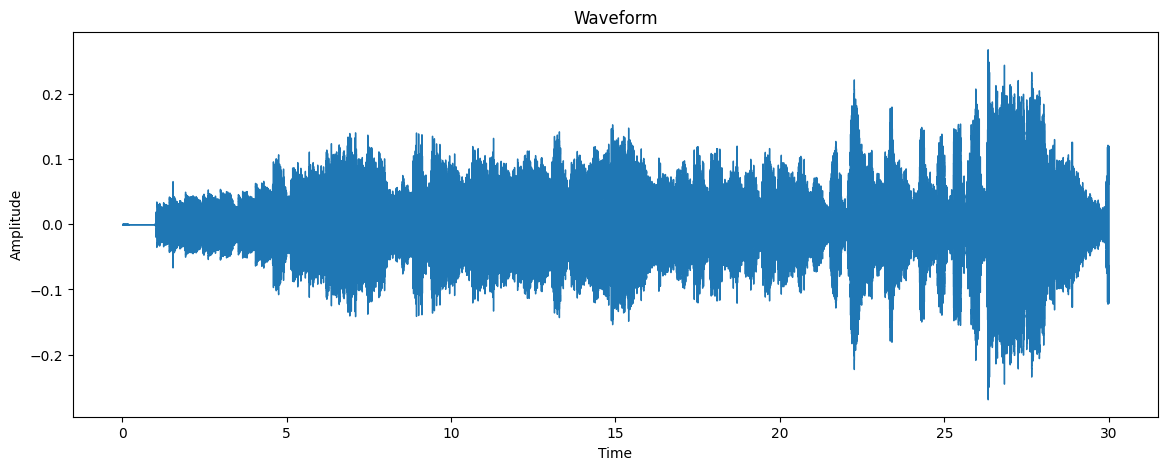

In [277]:
## MP3 Audio File to Visual
plt.figure(figsize=(14, 5))
plt.title("Waveform")
plt.ylabel("Amplitude")
librosa.display.waveshow(x, sr=sr)
plt.savefig("Waveform.png")
plt.show()

In [259]:
# Extracting the length and the half-length of the signal to input to the fourier transform
freq_sample, audio = wavfile.read(uploadedaudio)
sig_length = len(audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)

<ipython-input-259-7b592fda7580>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)


In [260]:
# Frequency domain of the signal us FFT
signal_freq = np.fft.fft(audio)

In [261]:
# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)

In [262]:
# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
    signal_freq[1:transform_len] *= 2
else:
    signal_freq[1:transform_len-1] *= 2

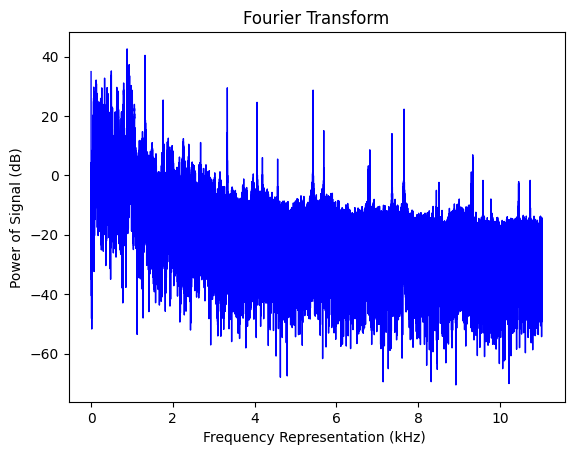

In [263]:
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.xlabel("Frequency Representation (kHz) ")
plt.ylabel("Power of Signal (dB)")
plt.title("Fourier Transform")
plt.plot(x_axis, exp_signal, color='blue', linewidth=1)

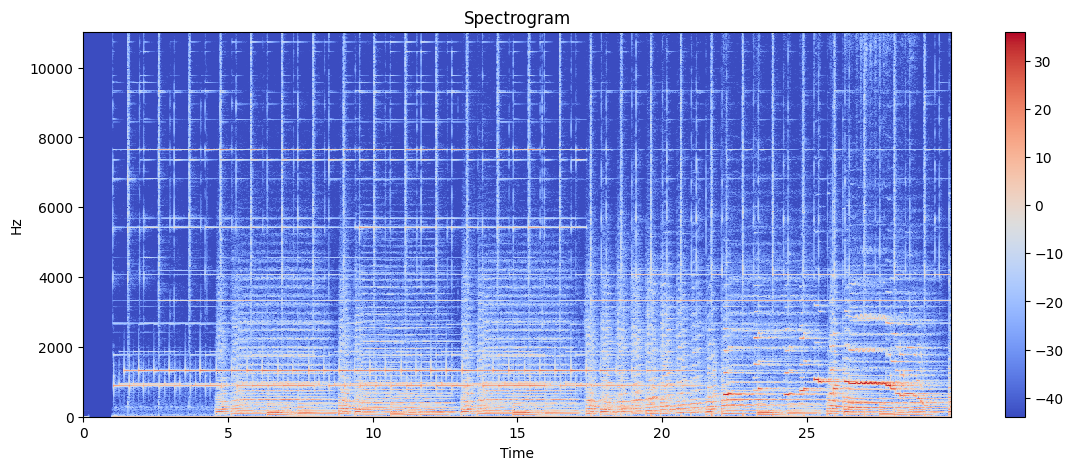

In [297]:
## Spectrogram 
Spectrogram = librosa.stft(x)
Spectrogramdb = librosa.amplitude_to_db(abs(Spectrogram))
plt.figure(figsize=(14, 5))
plt.title("Spectrogram")
librosa.display.specshow(Spectrogramdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [266]:
## Estimated Onsets of Signals 
onsets = librosa.onset.onset_detect(y=x, sr=sr)
print(onsets)

[  45   54   62   67   76   83   85   91   98  106  113  122  129  136
  144  152  158  168  175  182  190  198  204  222  228  245  250  268
  274  296  314  320  336  343  359  366  375  382  388  405  412  433
  451  458  474  480  497  504  519  526  543  549  564  572  588  595
  617  641  658  663  681  688  703  710  719  727  734  749  756  771
  773  780  801  817  824  839  845  861  863  869  885  890  906  913
  928  935  951  959  981  999 1005 1026 1043 1050 1072 1089 1096 1109
 1119 1132 1135 1141 1163 1186 1196 1203 1208 1217 1225 1231 1252 1268
 1275 1289]


In [267]:
onset_times = librosa.frames_to_time(onsets)
print(onset_times)

[ 1.04489796  1.25387755  1.43963719  1.55573696  1.76471655  1.92725624
  1.97369615  2.11301587  2.27555556  2.46131519  2.62385488  2.83283447
  2.99537415  3.15791383  3.34367347  3.52943311  3.66875283  3.90095238
  4.06349206  4.22603175  4.41179138  4.59755102  4.73687075  5.15482993
  5.29414966  5.68888889  5.80498866  6.22294785  6.36226757  6.87310658
  7.29106576  7.43038549  7.80190476  7.96444444  8.33596372  8.4985034
  8.70748299  8.87002268  9.0093424   9.40408163  9.56662132 10.05424036
 10.47219955 10.63473923 11.0062585  11.14557823 11.54031746 11.70285714
 12.05115646 12.21369615 12.60843537 12.7477551  13.09605442 13.28181406
 13.65333333 13.81587302 14.32671202 14.88399093 15.27873016 15.39482993
 15.81278912 15.9753288  16.32362812 16.4861678  16.69514739 16.88090703
 17.04344671 17.39174603 17.55428571 17.90258503 17.94902494 18.11156463
 18.59918367 18.97070295 19.13324263 19.48154195 19.62086168 19.99238095
 20.03882086 20.17814059 20.54965986 20.66575964 21.

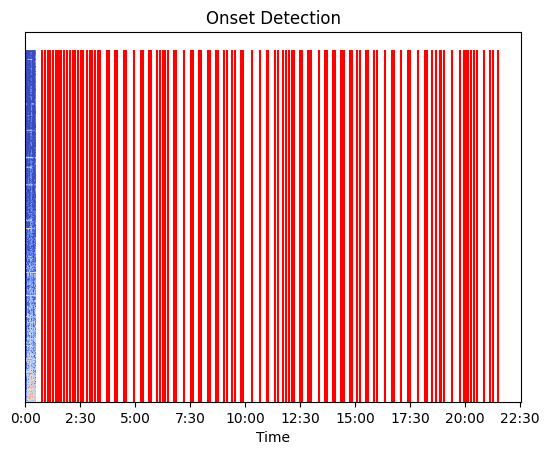

In [296]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(logS, sr=sr, alpha=1.0, x_axis='time')
plt.title('Onset Detection')
plt.vlines(onsets, 0, logS.shape[0], color='r')

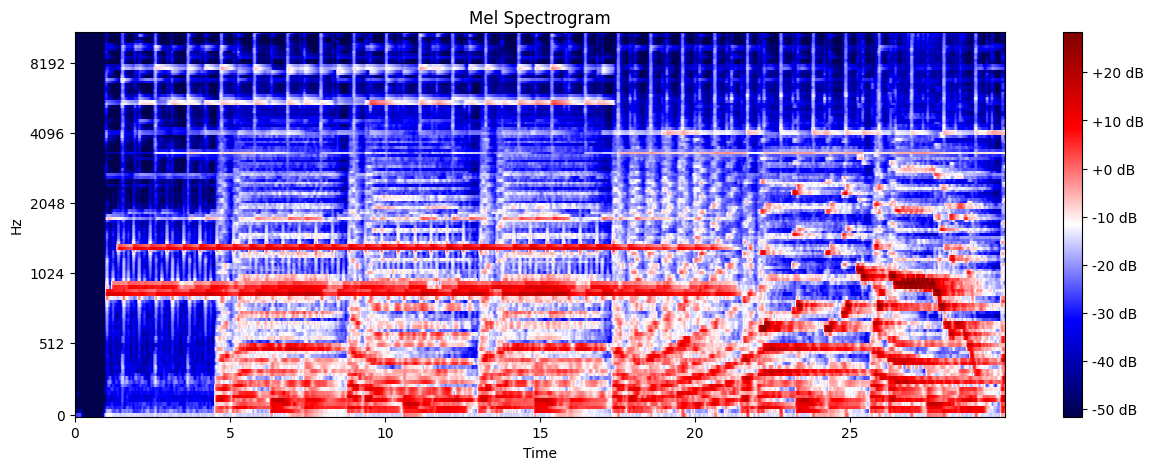

In [299]:
## Mel Spectrogram
hop_length = 256
S = librosa.feature.melspectrogram(y=x, sr=sr, n_fft=4096, hop_length=hop_length)
logS = librosa.power_to_db(abs(S))

plt.figure(figsize=(15, 5))
plt.title('Mel Spectrogram')
librosa.display.specshow(logS, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap = "seismic")
plt.colorbar(format='%+2.0f dB')

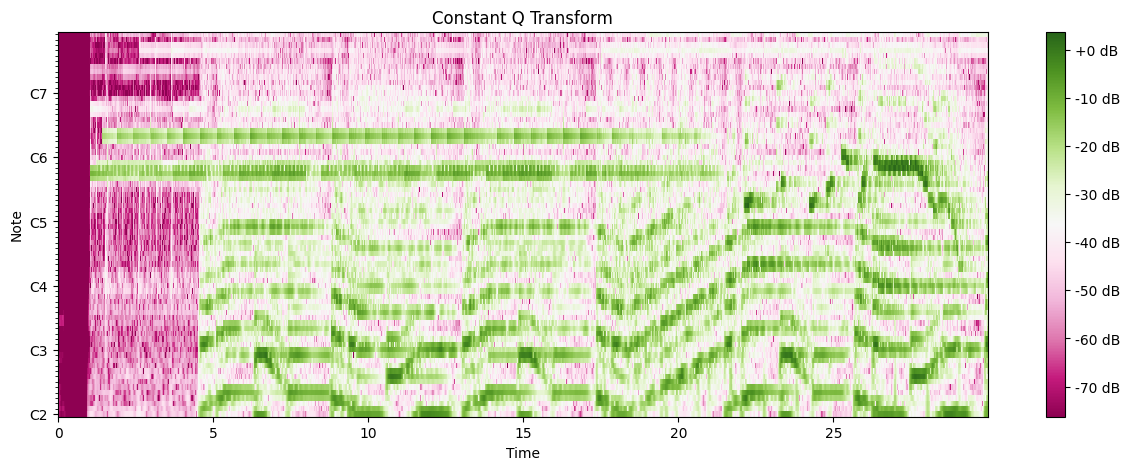

In [300]:
## Constant Q Transform 
constantq = librosa.midi_to_hz(36)
C = librosa.cqt(x, sr=sr, fmin=constantq, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))

plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=constantq, cmap='PiYG')
plt.title('Constant Q Transform')
plt.colorbar(format='%+2.0f dB')

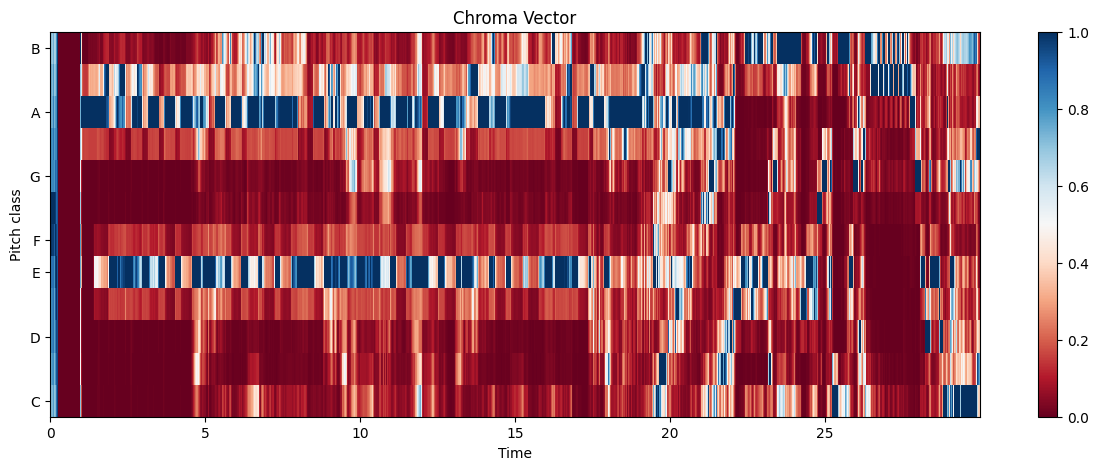

In [301]:
## Chroma Vector
chroma = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
plt.title('Chroma Vector')
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='RdBu')
plt.colorbar()

In [304]:
clicks = librosa.clicks(frames=onsets, sr=sr, length=len(x))
ipd.Audio(np.vstack([x, clicks]), rate=sr)